In [138]:
################## import certain packages #######################
import math as m
import math  
from math import log, sqrt, pi, exp
import numpy as np
import scipy.stats as si
import sympy as sy
from sympy.stats import Normal, cdf
from sympy import init_printing
from datetime import datetime, date
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame
init_printing()



################ Les différents entrer data ##################
    #S: stock price
    #K: strike price
    #T: date de maturite
    #r: taux sans risque
    #q: taux continue de dividende 
    #sigma: volatilite 
    
S = 80
K = 70.5
r = .0405
sigma = .27
T = 0.4
q = 0.1
n = 17

In [139]:

################## Le modèle du pricing discret BOPM  ##################


####le portefeuille sous-jacent sur 15 périodes 

def bop(n,t,S,sigma):
    dt = t/n
    u = m.exp(sigma*m.sqrt(dt))
    d = 1/u
    priceMatrix = np.zeros((n+1, n+1))
    for j in range(n+1):
        for i in range(j+1):
            priceMatrix[i,j] = S*m.pow(d,i) * m.pow(u,j-i)
    return priceMatrix    

print("la valeur de u est  ", m.exp(sigma*m.sqrt(T/n)))

print("\nla valeur de d est  ", 1/(m.exp(sigma*m.sqrt(T/n))))

print("\n\n Affichage de l'arbre CRR, montrant l'évolution du prix du sous-jacent : \n \n",np.matrix(priceMatrix.astype(int)))


####le portefeuille de réplication.

def OptionsVal(n, S, K, r, sigma, T,q, priceMatrix):
	dt = T/n
	u = m.exp(sigma*m.sqrt(dt))
	d = 1/u
	p = (m.exp((r-q)*dt)-d)/(u-d)
	putMatrix = np.zeros((n+1, n+1))
	callMatrix = np.zeros((n+1, n+1))

	for j in range(n+1, 0, -1):
		for i in range(j):
			if(j == n+1):
				putMatrix[i,j-1] = max(K-priceMatrix[i,j-1], 0)
				callMatrix[i,j-1] = max(priceMatrix[i,j-1]-K, 0)     
			else:
				putMatrix[i,j-1] = m.exp(-r*dt) * (p*putMatrix[i,j] + (1-p)*putMatrix[i+1,j])             
				callMatrix[i,j-1] = m.exp(-r*dt) * (p*callMatrix[i,j] + (1-p)*callMatrix[i+1,j])                                          
    
	return [putMatrix,callMatrix]

priceMatrix = bop(n,T,S,sigma)
putM,callM  = OptionsVal(n,S,K,r,sigma,T,q,priceMatrix)

print("\n Prix de l'option Call à chaque niveau de l'arbre Option:\n \n ",np.matrix(callM.astype(int)))

print("\n Prix de l'option Put à chaque niveau de l'arbre Option:\n \n ",np.matrix(putM.astype(int)))


#### Resultat

print("\nD'apres Le modèle du pricing discret BOPM, le prix du call est",callM[0][0])

print("\nD'apres Le modèle du pricing discret BOPM, le prix du put est",putM[0][0])


la valeur de u est   1.0422857202069822

la valeur de d est   0.9594298191108434


 Affichage de l'arbre CRR, montrant l'évolution du prix du sous-jacent : 
 
 [[ 80  83  86  90  94  98 102 106 111 116 121 126 131 137 142 148 155 161]
 [  0  76  80  83  86  90  94  98 102 106 111 116 121 126 131 137 142 148]
 [  0   0  73  76  80  83  86  90  94  98 102 106 111 116 121 126 131 137]
 [  0   0   0  70  73  76  79  83  86  90  94  98 102 106 111 116 121 126]
 [  0   0   0   0  67  70  73  76  80  83  86  90  94  98 102 106 111 116]
 [  0   0   0   0   0  65  67  70  73  76  80  83  86  90  94  98 102 106]
 [  0   0   0   0   0   0  62  65  67  70  73  76  79  83  86  90  94  98]
 [  0   0   0   0   0   0   0  59  62  65  67  70  73  76  80  83  86  90]
 [  0   0   0   0   0   0   0   0  57  59  62  65  67  70  73  76  80  83]
 [  0   0   0   0   0   0   0   0   0  55  57  59  62  65  67  70  73  76]
 [  0   0   0   0   0   0   0   0   0   0  52  55  57  59  62  65  67  70]
 [  0   0   0  

In [140]:
################## le modele de black_scholes ##################


def black_scholes(S, K, T, r, q, sigma, option = 'call'):
    
    d1 = (np.log(S / K) + ((r - q )+ 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = (np.log(S / K) + ((r - q) - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    
    if option == 'call':
        result = (S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0))
    if option == 'put':
        result = (K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0) - S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0))
        
    return result
    

print("\nLe prix du call selon black scholes est",black_scholes(S, K, T, r, q, sigma, option = 'call'))

print("\nLe prix du call selon black scholes est",black_scholes(S, K, T, r, q, sigma, option = 'put'))


Le prix du call selon black scholes est 9.591980526658858

Le prix du call selon black scholes est 2.0959266506848486


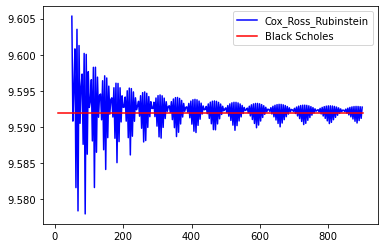

In [152]:
## define Cox_Ross_Rubinstein binomial model

def Cox_Ross_Rubinstein_Tree(S,K,T,r,sigma,N,q, Option_type): 

    u=math.exp(sigma*math.sqrt(T/N));

    d=math.exp(-sigma*math.sqrt(T/N));

    pu=((math.exp((r-q)*T/N))-d)/(u-d);

    pd=1-pu;

    disc=math.exp(-r*T/N);

    St = [0] * (N+1)

    C = [0] * (N+1)

    St[0]=S*d**N;
    
    for j in range(1, N+1): 

        St[j] = St[j-1] * u/d;
        
    for j in range(1, N+1):

        if Option_type == 'P':

            C[j] = max(K-St[j],0);

        elif Option_type == 'C':

            C[j] = max(St[j]-K,0);
            
    for i in range(N, 0, -1):

        for j in range(0, i):

            C[j] = disc*(pu*C[j+1]+pd*C[j]);     

    return C[0]


#### le call de l'option dans des differents sur periode
BSPrice = black_scholes(S, K, T, r, q, sigma, option = 'call')
BS = [BSPrice,BSPrice]
BSRuns = [10,900]

runs1 = list(range(50,900,3))
CRR1 = []
for i in runs1:

    CRR1.append(Cox_Ross_Rubinstein_Tree(S, K, T, r, sigma,i ,q,'C'))

plt.plot(runs1, CRR1, 'b',label='Cox_Ross_Rubinstein')
plt.plot(BSRuns, BS, 'r',label='Black Scholes')
plt.legend(loc='upper right')
plt.show()

In [142]:
################## les lettres greeks ##################

def delta(S, K, T, r, q, sigma, option = 'call'):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    
    if option == 'call':
        delta = np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0)
    if option == 'put':
        delta = -np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0)
        
    return delta

########

def theta(S, K, T, r, q, sigma, option = 'call'):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    
    if option == 'call':
        theta = -np.exp(-q * T) * (S * si.norm.cdf(d1, 0.0, 1.0) * sigma) / (2 * np.sqrt(T)) - r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0) + q * S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0)
    if option == 'put':
        theta = -np.exp(-q * T) * (S * si.norm.cdf(d1, 0.0, 1.0) * sigma) / (2 * np.sqrt(T)) + r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0) - q * S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0)
        
    return theta

########

def rho(S, K, T, r, q, sigma, option = 'call'):
    
    d2 = (np.log(S / K) + (r - q - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    
    if option == 'call':
        rho = K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    if option == 'put':
        rho = -K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
        
    return rho

########

def gamma(S, K, T, r, q, sigma):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    
    gamma = np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) / S * sigma * np.sqrt(T)
    
    return gamma

########

def vega(S, K, T, r, q, sigma):

    d1 = (np.log(S / K) + (r - q + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    
    vega = 1 / np.sqrt(2 * np.pi) * S * np.exp(-q * T) * np.exp(-d1 ** 2 * 0.5) * np.sqrt(T)
    
    return vega


In [143]:
data = {'Call': [delta(S, K, T, r, q, sigma, option = 'call'),vega(S, K, T, r, q, sigma)
,gamma(S, K, T, r, q, sigma), theta(S, K, T, r, q, sigma, option = 'call'), rho(S, K, T, r, q, sigma, option = 'call')],
        'Put': [delta(S, K, T, r, q, sigma, option = 'put'),vega(S, K, T, r, q, sigma),
gamma(S, K, T, r, q, sigma), theta(S, K, T, r, q, sigma, option = 'put'), rho(S, K, T, r, q, sigma, option = 'put')]}
input_frame = DataFrame(data, columns=['Call', 'Put'], 
                   index=['delta','gamma','vega', 'theta', 'rho'])
input_frame




,Call,Put
delta,0.724182,-0.236607
gamma,15.324330,15.324330
vega,0.001546,0.001546
theta,-8.530770,-13.407718
rho,19.337040,-8.409800
